In [1]:
import numpy as np
from matplotlib import pyplot as plt

To solve $\min_x f(x)$ 

for $f: \mathbb{R}^n \rightarrow \mathbb{R}$.

> "The direction of negative gradient is a good direction to search if we want to find a function minimizer."

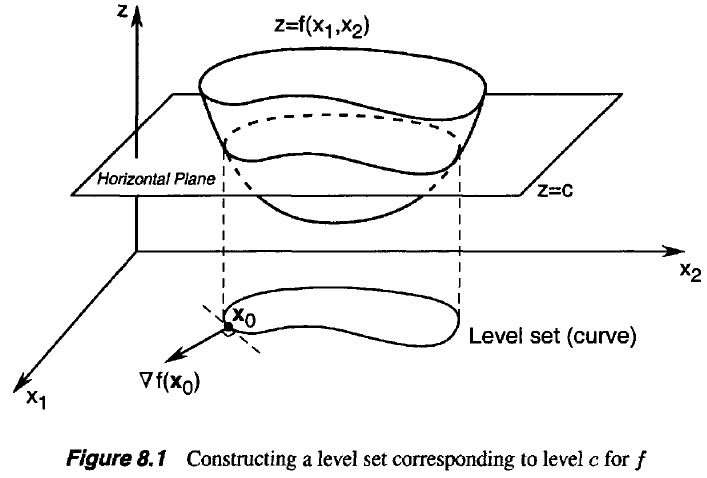

At point $x_0$, $\nabla f(x_0)$ points to the direction of maximal ascend.

$\Rightarrow - \nabla f(x_0)$ points to the direction of maximal descend. 

Recall [Taylor series](#Taylor)

$$f(a + h) = f(a) + \frac{h}{1!} f^{(1)}(a) + o(h)$$

Thus, for $a = x^{(0)}$ and $h = - \alpha \nabla f(x^{(0)})$

$$f(x^{(0)} - \alpha \nabla f(x^{(0)})) = f(x^{(0)}) - \alpha \| \nabla f(x^{(0)}) \|^2 + o(\alpha)$$

If $\nabla f(x^{(0)}) \neq \mathbf{0}$ , then for sufficiently small $\alpha > 0$ , we have

$$f(x^{(0)} - \alpha \nabla f(x^{(0)}) < f(x^{(0)})$$

Another word, if $\alpha$ is sufficiently small,

$x^{(0)} - \alpha \nabla f(x^{(0)}$ is a better solution than $x^{(0)}$

sorta "getting better in each step and keep getting better."

# Gradient descend algorithm

$$x^{(k+1)} = x^{(k)} - \alpha_k \nabla f(x^{(k)})$$

## Example

$$\min_x x^T Q x + b^T x$$

where $x \in \mathbb{R}^2$ .

Let
\begin{align}
Q = \begin{bmatrix}
     2 & 1 \\
     1 & 3
    \end{bmatrix}
\end{align}
and
\begin{align}
b = \begin{bmatrix}
    5 \\ -3
    \end{bmatrix}
\end{align}

In [2]:
def loss(x):
    Q = np.array([[2, 1], [1, 3]])
    b = np.array([[5], [-3]])

    return x.T @ Q @ x + b.T @ x

In [3]:
x = np.array([[0], [1]])

loss(x)

array([[0]])

In [4]:
xs = np.linspace(1, 5, 3)
ys = np.linspace(1, 5, 3)

[loss(np.array([[xs[i]], [ys[i]]]))[0,0] for i in range(3)]

[9.0, 69.0, 185.0]

In [5]:
# 3D Plot

# Create the mesh in polar coordinates and compute corresponding Z.
Nx = 100
Ny = 100
xs = np.linspace(-2.5, 2.5, Nx)
ys = np.linspace(-3, 3, Ny)
X, Y = np.meshgrid(xs, ys)

Z = np.array([[loss(np.array([[xs[i]], [ys[j]]]))[0,0] 
      for i in range(Nx)] for j in range(Ny)])


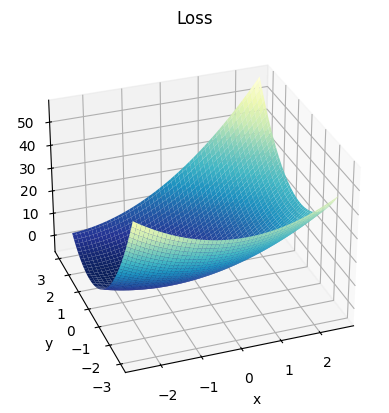

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the surface.
# ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)  # Spicy with color mapping

ax.view_init(elev=30, azim=250)

ax.set_title('Loss')
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('Loss')

plt.show()

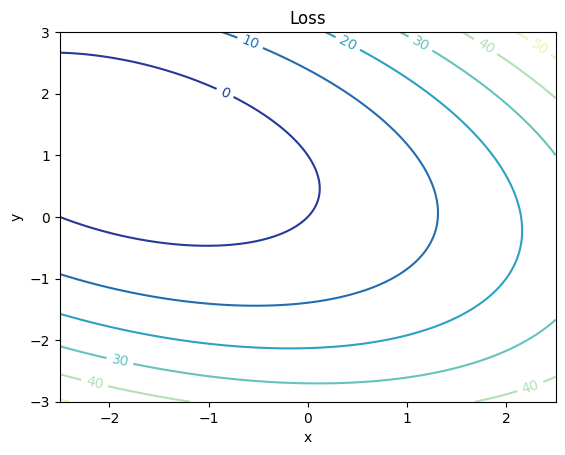

In [7]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the contour.
# ax.contour(X, Y, Z)
CS = ax.contour(X, Y, Z, cmap=plt.cm.YlGnBu_r)  # Spicy with color mapping
# ax.contour(X, Y, Z, 10, cmap=plt.cm.YlGnBu_r)

ax.clabel(CS, CS.levels, inline=True, fontsize=10)

ax.set_title('Loss')
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('Loss')

plt.show()

## GD Implementation

GD needs 

* gradient $\nabla f$,
* initial point $x_0$,
* step size $\alpha$, and
* a number of steps $N$.



$f(x) = x^T Q x + b^T x$

\begin{align}
\nabla f = \begin{bmatrix}
\frac{\partial f(x)}{\partial x_1} \\
\frac{\partial f(x)}{\partial x_2}
\end{bmatrix}
\end{align}

Given that $Q$ is symmetry.

\begin{align}
\nabla f(x) &= 2 Q x + b
\end{align}

See [Gradient of quadratic function](#GradientQuadratic) for detail.

In [8]:
def gradQ(x):
    Q = np.array([[2, 1], [1, 3]])
    b = np.array([[5], [-3]])

    return 2 * Q @ x + b    

In [9]:
gradQ(np.array([[2], [3]]))

array([[19],
       [19]])

In [10]:
gradQ(np.array([[1], [-1]]))

array([[ 7],
       [-7]])

In [11]:
gradQ(np.array([[1], [-2]]))

array([[  5],
       [-13]])

## Put them together

In [12]:
x0 = np.array([[1],[-1]])
lr = 0.05
N = 20

xs = [x0]

x = x0
for n in range(N):
    x = x - lr*gradQ(x)
    xs.append(x)
x

array([[-1.6485862],
       [ 1.0063747]])

In [13]:
loss(x)

array([[-6.10620296]])

In [14]:
gradQ(x)

array([[ 0.41840462],
       [-0.25892418]])

In [15]:
loss(x0)

array([[11]])

In [16]:
xs = np.array(xs).reshape((-1,2))
xs.shape

(21, 2)

## Pretty plot

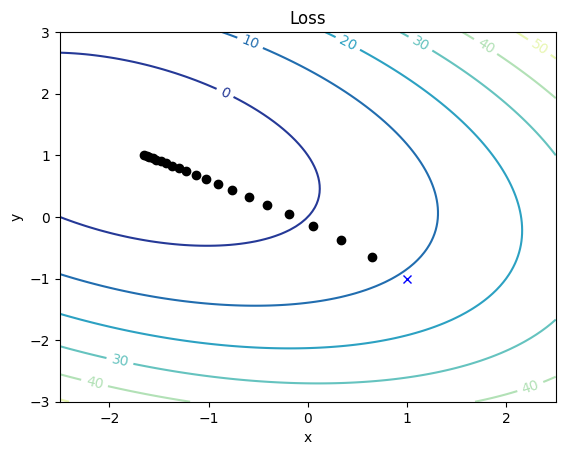

In [17]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the contour.
# ax.contour(X, Y, Z)
CS = ax.contour(X, Y, Z, cmap=plt.cm.YlGnBu_r)  # Spicy with color mapping
# ax.contour(X, Y, Z, 10, cmap=plt.cm.YlGnBu_r)

ax.clabel(CS, CS.levels, inline=True, fontsize=10)

ax.set_title('Loss')
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('Loss')

# Add solutions
ax.plot(x0[0], x0[1], 'bx')
ax.plot(xs[1:,0], xs[1:,1], 'ko')

plt.show()

## Progressing loss

In [18]:
losses = np.array([loss(x) for x in xs])

In [19]:
losses.shape

(21, 1)

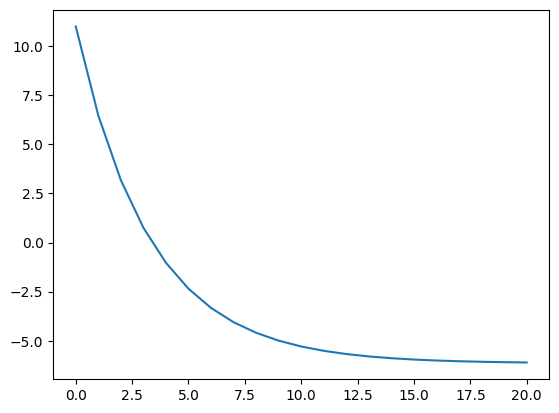

In [20]:
plt.plot(losses)

Final x =
[[-1.6485862]
 [ 1.0063747]]
Final loss =
[[-6.10620296]]


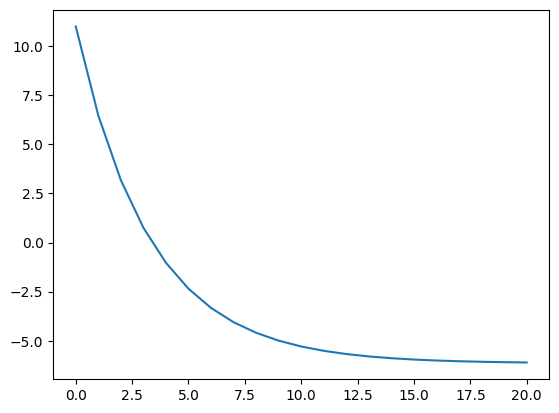

In [21]:
x0 = np.array([[1],[-1]])
lr = 0.05
N = 20

xs = [x0]

x = x0
for n in range(N):
    x = x - lr*gradQ(x)
    xs.append(x)
print('Final x =')
print(x)
print('Final loss =')
print(loss(x))

xs = np.array(xs).reshape((-1,2))
losses = np.array([loss(x) for x in xs])
plt.plot(losses)

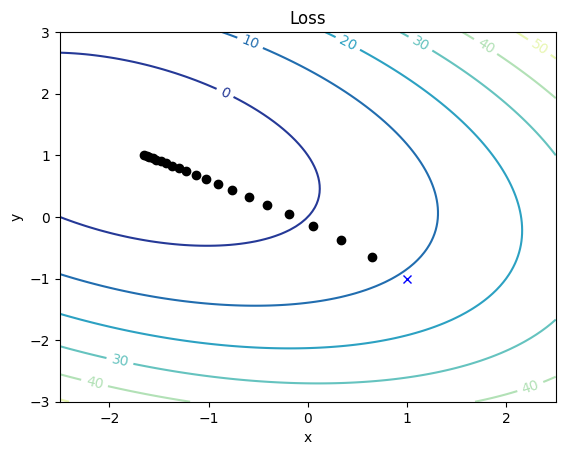

In [22]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the contour.
# ax.contour(X, Y, Z)
CS = ax.contour(X, Y, Z, cmap=plt.cm.YlGnBu_r)  # Spicy with color mapping
# ax.contour(X, Y, Z, 10, cmap=plt.cm.YlGnBu_r)

ax.clabel(CS, CS.levels, inline=True, fontsize=10)

ax.set_title('Loss')
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('Loss')

# Add solutions
ax.plot(x0[0], x0[1], 'bx')
ax.plot(xs[1:,0], xs[1:,1], 'ko')

plt.show()

## Pack it as a function

In [23]:
def gd(df, x0, lr, N, log=True):
    if log:
        xs = [x0]

    D,_ = x0.shape
    
    x = x0
    for n in range(N):
        x = x - lr*df(x)
        if log:
            xs.append(x)


    if log:
        return x, np.array(xs).reshape((-1,D)).T
    
    return x


In [24]:
xs.shape

(21, 2)

In [25]:
x0.shape

(2, 1)

xo =
[[-1.79531627]
 [ 1.09710529]]


ValueError: x and y can be no greater than 2D, but have shapes (31,) and (31, 1, 1)

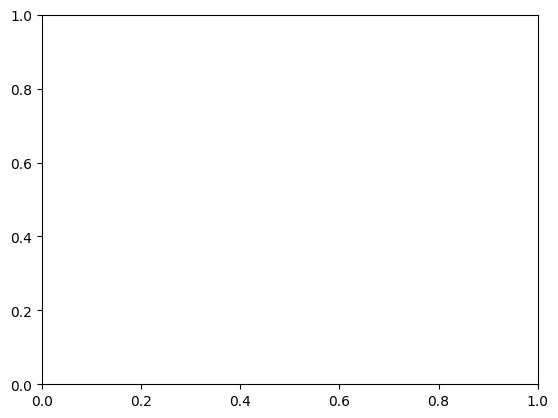

In [26]:
x0 = np.array([[1],[-1]])
lr = 0.07
N = 30
xo, xs = gd(gradQ, x0, lr, N, log=True)
print('xo =')
print(xo)

_, N = xs.shape

losses = np.array([loss(xs[:, [i]]) for i in range(N)])
plt.plot(losses)

# Steepest gradient descend method

Recall gradient descend,

$$x^{(k+1)} = x^{(k)} - \alpha_k \nabla f(x^{(k)})$$

"Optimize the optimizer" $\rightarrow$ "Steepest Gradient Descend Method"

* Gradient descend method with step size $\alpha_k$ chosen to have largest descend in each step.

$$\alpha_k = \arg\min_{\alpha \geq 0} f(x^{(k)} - \alpha \nabla f(x^{(k)})$$

How do we do this?

Recall that we have one-dimensional search.

## Code

In [27]:
# Here I'll use golden section search,
# but this is just an option.

def goldsec(f, a0, b0, N, log=True):
    rho = 0.382
    
    a = a0
    b = b0
    
    fL = f(a)
    fR = f(b)
    
    d = rho*(b - a)
    ak = a + d
    bk = b - d
    
    fak = f(ak)
    fbk = f(bk)
    
    ab = []
    
    for n in range(N):
        if fak < fbk:
            b = bk
            fR = fbk

            bk = ak
            fbk = fak
            d = rho*(b - a)
            ak = a + d
            fak = f(ak)
        else:
            a = ak
            fL = fak

            ak = bk
            fak = fbk
            d = rho*(b - a)
            bk = b - d
            fbk = f(bk)        
        # end if
        if log:
            # print(n, f': x=[{a} , {b}] : f=[{fL} , {fR}]')
            ab.append([a, b])
    # end for
    
    if log:
        return (a,b), ab
    
    return (a,b)

In [28]:
# If we want step size to be in tol 0.0001
# 0.0001 = 0.61803**N
# or
# log(0.0001) = N log(0.61803)
N = np.log(0.0001)/np.log(0.61803)
N

19.13963116875076

In [29]:
def steepestGD(lossf, gradf, x0, N, lrN=20):
    xs = [x0]

    D,_ = x0.shape
    x = x0
    for n in range(N):

        gdx = gradf(x)

        # This sub-objective has to be re-defined every step.
        alpha_loss = lambda a: lossf(x - a*gdx)
        
        # We limit our search to step size in [0,1].
        lrl, lrh = goldsec(alpha_loss, 0, 1, lrN, log=False)
        lr = (lrl + lrh)/2
        
        # GD
        x = x - lr*gdx
        xs.append(x)
    xs = np.array(xs).reshape((-1,D)).T
    return x, xs    

## Example

$$\min_x x^T Q x + b^T x$$

where 
\begin{align}
Q = \begin{bmatrix}
     2 & 1 \\
     1 & 3
    \end{bmatrix}
\end{align}
and
\begin{align}
b = \begin{bmatrix}
    5 \\ -3
    \end{bmatrix}
\end{align}

In [30]:
def loss(x):
    Q = np.array([[2, 1], [1, 3]])
    b = np.array([[5], [-3]])

    return (x.T @ Q @ x + b.T @ x)[0,0]

In [31]:
def gradQ(x):
    Q = np.array([[2, 1], [1, 3]])
    b = np.array([[5], [-3]])

    return 2 * Q @ x + b    

In [32]:
x0 = np.array([[1],[-1]])
N = 20

xo, logxs = steepestGD(loss, gradQ, x0, N)

## Pretty plot

In [33]:
# 3D Plot

# Create the mesh in polar coordinates and compute corresponding Z.
Nx = 100
Ny = 100
xs = np.linspace(-2.5, 2.5, Nx)
ys = np.linspace(-3, 3, Ny)
X, Y = np.meshgrid(xs, ys)

Z = np.array([[loss(np.array([[xs[i]], [ys[j]]])) 
      for i in range(Nx)] for j in range(Ny)])


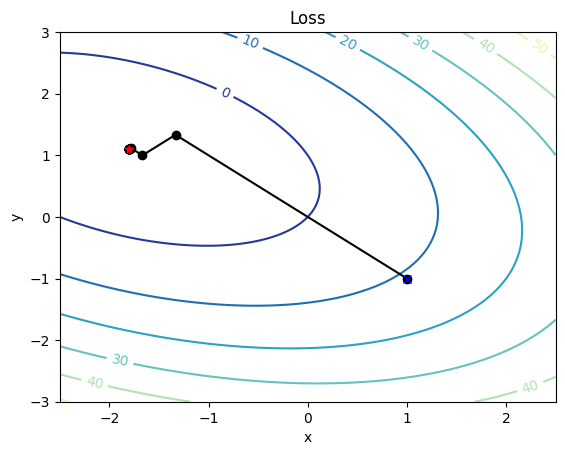

In [34]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the contour.
# ax.contour(X, Y, Z)
CS = ax.contour(X, Y, Z, cmap=plt.cm.YlGnBu_r)  # Spicy with color mapping
# ax.contour(X, Y, Z, 10, cmap=plt.cm.YlGnBu_r)

ax.clabel(CS, CS.levels, inline=True, fontsize=10)

ax.set_title('Loss')
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('Loss')

# Add solutions
ax.plot(logxs[0,:], logxs[1,:], 'ko-')
ax.plot(x0[0], x0[1], 'bx')
ax.plot(xo[0,0], xo[1,0], 'r*')

plt.show()

## Progressing loss

In [35]:
logxs.shape

(2, 21)

In [36]:
_, N = logxs.shape
losses = np.array([loss(logxs[:,[i]]) for i in range(N)])

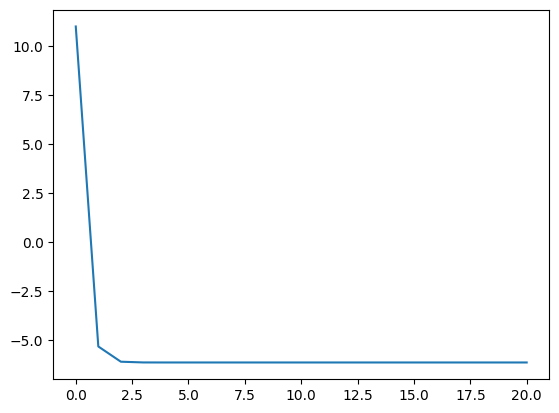

In [37]:
plt.plot(losses)

## Remark

Notice the zig-zag behavior.

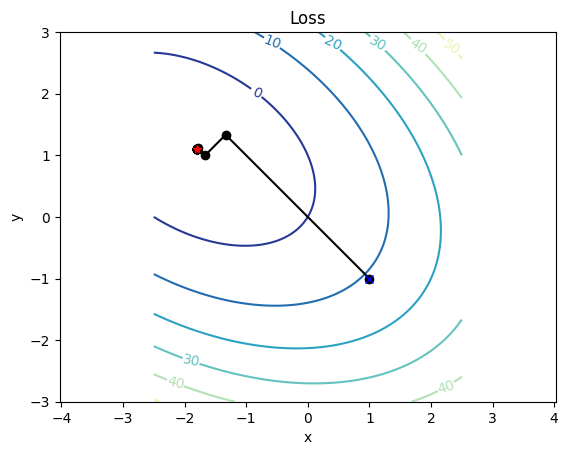

In [38]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the contour.
# ax.contour(X, Y, Z)
CS = ax.contour(X, Y, Z, cmap=plt.cm.YlGnBu_r)  # Spicy with color mapping
# ax.contour(X, Y, Z, 10, cmap=plt.cm.YlGnBu_r)

ax.clabel(CS, CS.levels, inline=True, fontsize=10)

ax.set_title('Loss')
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('Loss')

# Add solutions
ax.plot(logxs[0,:], logxs[1,:], 'ko-')
ax.plot(x0[0], x0[1], 'bx')
ax.plot(xo[0,0], xo[1,0], 'r*')
ax.axis('equal')

plt.show()

# Gradient descend with momentum

Gradient descend with momentum algorithm updates $x$ with

$$x^{(k+1)} = x^{(k)} - \alpha v^{(k)}$$

where
$$v^{(k)} = \beta v^{(k-1)} + (1 - \beta) \nabla f$$

Momentum $\beta \in [0, 1)$

* When $\beta = 0$, GDM is GD.

* The closer $\beta$ is to 1, the higher the inertia is.

## Code

In [39]:
def gdm(df, x0, lr, N, m=0.5):
    xs = [x0]

    D,_ = x0.shape

    x = x0
    v = df(x)
    for n in range(N):

        v = m*v + (1 - m)*df(x)
        
        x = x - lr*v
        
        xs.append(x)

    xs = np.array(xs).reshape((-1,D)).T

    return x, xs


## Example

In [40]:
def loss(x):
    Q = np.array([[2, 1], [1, 3]])
    b = np.array([[5], [-3]])

    return (x.T @ Q @ x + b.T @ x)[0,0]

In [41]:
def gradQ(x):
    Q = np.array([[2, 1], [1, 3]])
    b = np.array([[5], [-3]])

    return 2 * Q @ x + b    

In [42]:
x0 = np.array([[1],[-1]])
N = 20
lr = 0.05
m = 0.5

xo, logxs = gdm(gradQ, x0, lr, N, m)

In [43]:
xo

array([[-1.72703512],
       [ 1.0547664 ]])

## Pretty plot

In [44]:
# 3D Plot

# Create the mesh in polar coordinates and compute corresponding Z.
Nx = 100
Ny = 100
xs = np.linspace(-2.5, 2.5, Nx)
ys = np.linspace(-3, 3, Ny)
X, Y = np.meshgrid(xs, ys)

Z = np.array([[loss(np.array([[xs[i]], [ys[j]]])) 
      for i in range(Nx)] for j in range(Ny)])


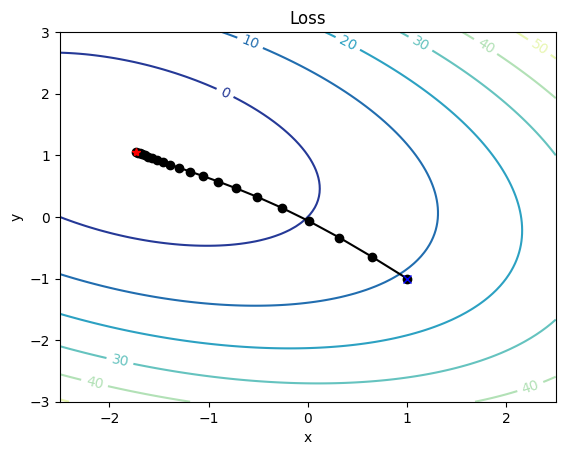

In [45]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the contour.
# ax.contour(X, Y, Z)
CS = ax.contour(X, Y, Z, cmap=plt.cm.YlGnBu_r)  # Spicy with color mapping
# ax.contour(X, Y, Z, 10, cmap=plt.cm.YlGnBu_r)

ax.clabel(CS, CS.levels, inline=True, fontsize=10)

ax.set_title('Loss')
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('Loss')

# Add solutions
ax.plot(logxs[0,:], logxs[1,:], 'ko-')
ax.plot(x0[0], x0[1], 'bx')
ax.plot(xo[0,0], xo[1,0], 'r*')

plt.show()

## Momentums

In [46]:
xo0, logxs0 = gdm(gradQ, x0, lr, N, m=0)
xo4, logxs4 = gdm(gradQ, x0, lr, N, m=0.4)
xo7, logxs7 = gdm(gradQ, x0, lr, N, m=0.7)
xo9, logxs9 = gdm(gradQ, x0, lr, N, m=0.9)

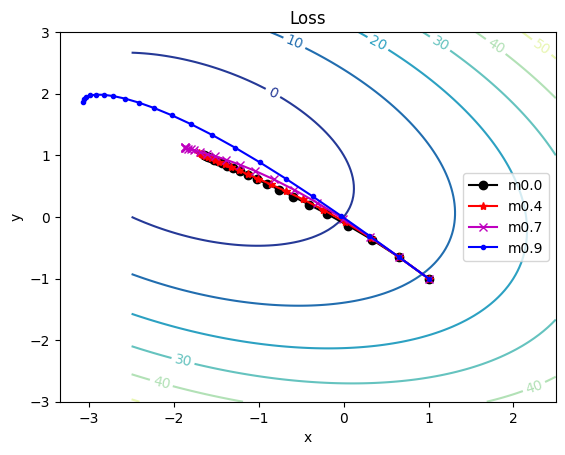

In [47]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the contour.
# ax.contour(X, Y, Z)
CS = ax.contour(X, Y, Z, cmap=plt.cm.YlGnBu_r)  # Spicy with color mapping
# ax.contour(X, Y, Z, 10, cmap=plt.cm.YlGnBu_r)

ax.clabel(CS, CS.levels, inline=True, fontsize=10)

ax.set_title('Loss')
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('Loss')

# Add solutions
ax.plot(logxs0[0,:], logxs0[1,:], 'ko-', label='m0.0')
ax.plot(logxs4[0,:], logxs4[1,:], 'r*-', label='m0.4')
ax.plot(logxs7[0,:], logxs7[1,:], 'mx-', label='m0.7')
ax.plot(logxs9[0,:], logxs9[1,:], 'b.-', label='m0.9')

ax.legend()
plt.show()

## Progressing loss

In [48]:
_, N = logxs0.shape
losses0 = np.array([loss(logxs0[:,[i]]) for i in range(N)])
losses4 = np.array([loss(logxs4[:,[i]]) for i in range(N)])
losses7 = np.array([loss(logxs7[:,[i]]) for i in range(N)])
losses9 = np.array([loss(logxs9[:,[i]]) for i in range(N)])


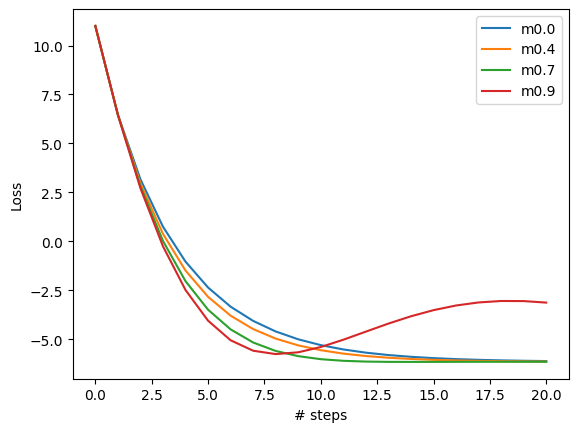

In [49]:
plt.plot(losses0, label='m0.0')
plt.plot(losses4, label='m0.4')
plt.plot(losses7, label='m0.7')
plt.plot(losses9, label='m0.9')
plt.xlabel('# steps')
plt.ylabel('Loss')
plt.legend()


# RMSProp

RMSProp is to address the issue of zig-zag behavior by slowing down the fast moving gradient directions and speed up the slow moving gradient directions.

RMSProp update:

$$x^{(k+1)} = x^{(k)} - \alpha \frac{1}{\sqrt{S^{(k)}}} \odot \nabla f(x^{(k)})$$

where 

$$S^{(k)} = \gamma S^{(k-1)} + (1 - \gamma) \left( \nabla f(x^{(k)}) \right)^2$$

Note the $\left( \nabla f(x^{(k)}) \right)^2$ is computed element-wise: $\left( \nabla f(x^{(k)}) \right)^2 = \nabla f(x^{(k)}) \odot \nabla f(x^{(k)})$.

$\beta = 0$ $\Rightarrow$ no old scaling.

## Code

In [50]:
def rmsprop(df, x0, lr, N, gamma):
    xs = [x0]

    D,_ = x0.shape

    x = x0
    S = df(x)**2
    for n in range(N):
        g = df(x)

        S = gamma*S + (1 - gamma)* g**2
        
        x = x - lr * 1/np.sqrt(S) * g
        
        xs.append(x)

    xs = np.array(xs).reshape((-1,D)).T

    return x, xs


## Example

In [51]:
def loss(x):
    Q = np.array([[2, 1], [1, 3]])
    b = np.array([[5], [-3]])

    return (x.T @ Q @ x + b.T @ x)[0,0]

In [52]:
def gradQ(x):
    Q = np.array([[2, 1], [1, 3]])
    b = np.array([[5], [-3]])

    return 2 * Q @ x + b    

In [53]:
x0 = np.array([[1],[-1]])
N = 20
lr = 0.2
m = 0.5

xo, logxs = rmsprop(gradQ, x0, lr, N, m)

In [54]:
xo

array([[-1.97530622],
       [ 0.98877994]])

In [55]:
loss(xo)

-6.0124306179880795

## Pretty plot

In [56]:
# 3D Plot

# Create the mesh in polar coordinates and compute corresponding Z.
Nx = 100
Ny = 100
xs = np.linspace(-2.5, 2.5, Nx)
ys = np.linspace(-3, 3, Ny)
X, Y = np.meshgrid(xs, ys)

Z = np.array([[loss(np.array([[xs[i]], [ys[j]]])) 
      for i in range(Nx)] for j in range(Ny)])


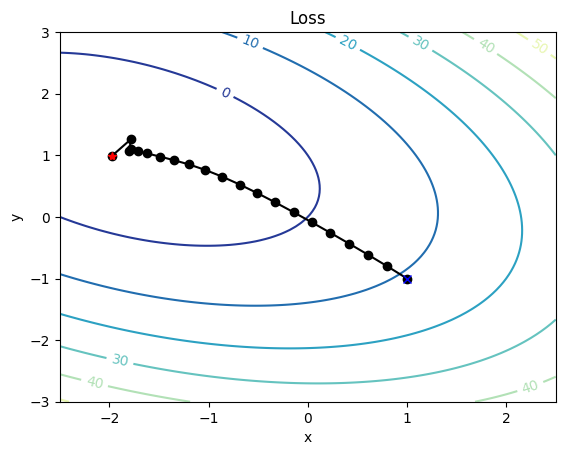

In [57]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the contour.
# ax.contour(X, Y, Z)
CS = ax.contour(X, Y, Z, cmap=plt.cm.YlGnBu_r)  # Spicy with color mapping
# ax.contour(X, Y, Z, 10, cmap=plt.cm.YlGnBu_r)

ax.clabel(CS, CS.levels, inline=True, fontsize=10)

ax.set_title('Loss')
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('Loss')

# Add solutions
ax.plot(logxs[0,:], logxs[1,:], 'ko-')
ax.plot(x0[0], x0[1], 'bx')
ax.plot(xo[0,0], xo[1,0], 'r*')

plt.show()

## Momentums

In [58]:
xo0, logxs0 = rmsprop(gradQ, x0, lr, N, 0.0)
xo4, logxs4 = rmsprop(gradQ, x0, lr, N, 0.4)
xo7, logxs7 = rmsprop(gradQ, x0, lr, N, 0.7)
xo9, logxs9 = rmsprop(gradQ, x0, lr, N, 0.9)

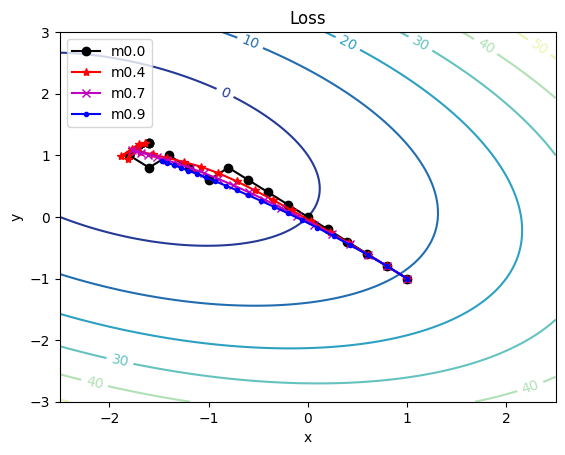

In [59]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the contour.
# ax.contour(X, Y, Z)
CS = ax.contour(X, Y, Z, cmap=plt.cm.YlGnBu_r)  # Spicy with color mapping
# ax.contour(X, Y, Z, 10, cmap=plt.cm.YlGnBu_r)

ax.clabel(CS, CS.levels, inline=True, fontsize=10)

ax.set_title('Loss')
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('Loss')

# Add solutions
ax.plot(logxs0[0,:], logxs0[1,:], 'ko-', label='m0.0')
ax.plot(logxs4[0,:], logxs4[1,:], 'r*-', label='m0.4')
ax.plot(logxs7[0,:], logxs7[1,:], 'mx-', label='m0.7')
ax.plot(logxs9[0,:], logxs9[1,:], 'b.-', label='m0.9')

ax.legend()
plt.show()

## Progressing loss

In [60]:
_, N = logxs0.shape
losses0 = np.array([loss(logxs0[:,[i]]) for i in range(N)])
losses4 = np.array([loss(logxs4[:,[i]]) for i in range(N)])
losses7 = np.array([loss(logxs7[:,[i]]) for i in range(N)])
losses9 = np.array([loss(logxs9[:,[i]]) for i in range(N)])


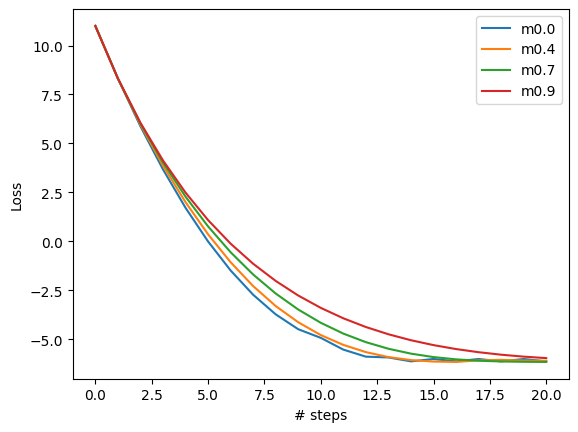

In [61]:
plt.plot(losses0, label='m0.0')
plt.plot(losses4, label='m0.4')
plt.plot(losses7, label='m0.7')
plt.plot(losses9, label='m0.9')
plt.xlabel('# steps')
plt.ylabel('Loss')
plt.legend()


In [62]:
print(f'gamma = 0.0: {losses0[-1]}')
print(f'gamma = 0.4: {losses4[-1]}')
print(f'gamma = 0.7: {losses7[-1]}')
print(f'gamma = 0.9: {losses9[-1]}')


gamma = 0.0: -6.12
gamma = 0.4: -6.091252604712793
gamma = 0.7: -6.148210284590828
gamma = 0.9: -5.954503501396937


# Adam

**Ada**ptive **m**oment estimation (ADAM) addresses the zig-zag behavior using 1<sup>st</sup> and 2<sup>nd</sup> moments. 

$\sim$ combining GDM (1<sup>st</sup> moment) and RMSprop (2<sup>nd</sup> moment).

**1.** Initialize all moments to zeros:

The first moments: $v_1 = 0$, $\ldots$, $v_M = 0$
&nbsp;&nbsp;&nbsp;&nbsp;(or $\mathbf{v}^{(0)} = \mathbf{0}$)

The second moments: $s_1 = 0$, $\ldots$, $s_M = 0$
&nbsp;&nbsp;&nbsp;&nbsp;(or $\mathbf{s}^{(0)} = \mathbf{0}$)

**2.** Each epoch $k$ compute gradient: 

$$\nabla f(\mathbf{x}^{(k)}) = \begin{bmatrix} \left. \frac{\partial f}{\partial x_1} \right|_{\mathbf{x}=\mathbf{x}^{(k)}} \\ 
\vdots \\
\left. \frac{\partial f}{\partial x_M} \right|_{\mathbf{x}=\mathbf{x}^{(k)}}  \end{bmatrix}$$

**3.** Compute the first moments:

$$v_m \leftarrow \beta v_m + (1 - \beta) \left. \frac{\partial f}{\partial x_m} \right|_{\mathbf{x} = \mathbf{x}^{(k)}} $$

or, vectorized version,

\begin{align}
\mathbf{v}^{(k)} = \beta \mathbf{v}^{(k-1)}
+ (1 - \beta) \nabla f(\mathbf{x}^{(k)})
\end{align}

for $k = 1, 2, 3, ...$


**4.** Compute the second moments:

$$s_m \leftarrow \gamma s_m + (1 - \gamma) \left. \frac{\partial f}{\partial x_m} \right|_{\mathbf{x} = \mathbf{x}^{(k)}} ^2$$



or, vectorized version,

\begin{align}
\mathbf{s}^{(k)} = \gamma \mathbf{s}^{(k-1)}
+ (1 - \gamma) \nabla f(\mathbf{x}^{(k)}) \odot \nabla f(\mathbf{x}^{(k)})
\end{align}

for $k = 1, 2, 3, ...$


**5.** Update search:

$$\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - \alpha \frac{1}{\sqrt{\mathbf{s}^{(k)} + \epsilon}} \odot \mathbf{v}^{(k)}$$

Term $\frac{1}{\sqrt{\mathbf{s}^{(k)} + \epsilon}}$ is computed element-wise.

These parameters seem to be fine:

* $\beta \approx 0.9$

* $\gamma \approx 0.999$

* $\epsilon \approx 10^{-8}$

The step size $\alpha$ is critical and needed to be tuned.

## Code

In [103]:
def adam(df, x0, lr, N, beta=0.9, gamma=0.999, eps=1e-8):
    xs = [x0]

    D,_ = x0.shape

    x = x0

    # 1. Initialization
           # g = df(x)
    V = 0  # V = g
    S = 0  # S = g**2
    
    for n in range(N):

        # 2. Compute gradient
        g = df(x)

        # 3. Compute 1st moment
        V = beta*V + (1 - beta)*g

        # 4. Compute 2nd moment
        S = gamma*S + (1 - gamma) * g**2
        
        # 5. Update
        x = x - lr * 1/np.sqrt(S + eps) * V
        
        xs.append(x)

    xs = np.array(xs).reshape((-1,D)).T

    return x, xs


## Example

In [104]:
def loss(x):
    Q = np.array([[2, 1], [1, 3]])
    b = np.array([[5], [-3]])

    return (x.T @ Q @ x + b.T @ x)[0,0]

def gradQ(x):
    Q = np.array([[2, 1], [1, 3]])
    b = np.array([[5], [-3]])

    return 2 * Q @ x + b    

In [105]:
x0 = np.array([[1],[-1]])
N = 20
lr = 0.2

xo, logxs = adam(gradQ, x0, lr, N)

In [106]:
xo

array([[-1.67644637],
       [ 1.00801205]])

In [107]:
loss(xo)

-6.11681454199265

## Pretty plot

In [69]:
# 3D Plot

# Create the mesh in polar coordinates and compute corresponding Z.
Nx = 100
Ny = 100
xs = np.linspace(-2.5, 2.5, Nx)
ys = np.linspace(-3, 3, Ny)
X, Y = np.meshgrid(xs, ys)

Z = np.array([[loss(np.array([[xs[i]], [ys[j]]])) 
      for i in range(Nx)] for j in range(Ny)])


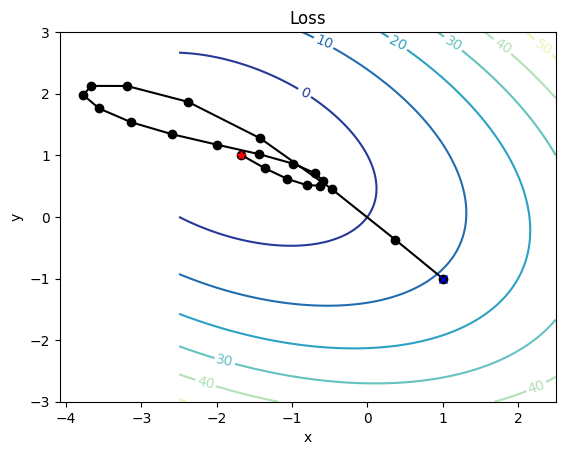

In [70]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the contour.
# ax.contour(X, Y, Z)
CS = ax.contour(X, Y, Z, cmap=plt.cm.YlGnBu_r)  # Spicy with color mapping
# ax.contour(X, Y, Z, 10, cmap=plt.cm.YlGnBu_r)

ax.clabel(CS, CS.levels, inline=True, fontsize=10)

ax.set_title('Loss')
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('Loss')

# Add solutions
ax.plot(logxs[0,:], logxs[1,:], 'ko-')
ax.plot(x0[0], x0[1], 'bx')
ax.plot(xo[0,0], xo[1,0], 'r*')

plt.show()

## Step sizes

In [85]:
N = 80

xo1, logxs1 = adam(gradQ, x0, 0.001, N)
xo3, logxs3 = adam(gradQ, x0, 0.01, N)
xo6, logxs6 = adam(gradQ, x0, 0.1, N)
xo7, logxs7 = adam(gradQ, x0, 0.2, N)
xo9, logxs9 = adam(gradQ, x0, 0.5, N)


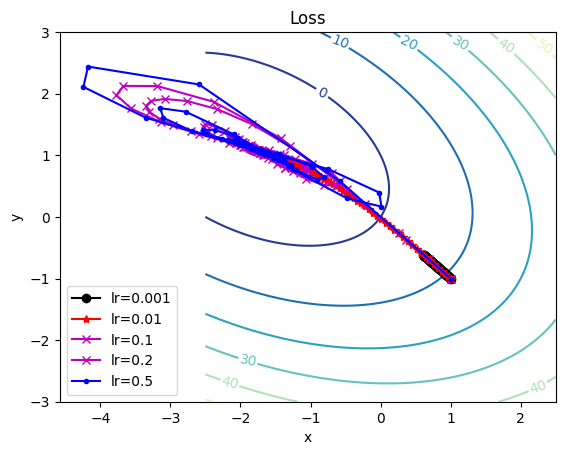

In [86]:
fig = plt.figure()
ax = fig.add_subplot()

# Plot the contour.
# ax.contour(X, Y, Z)
CS = ax.contour(X, Y, Z, cmap=plt.cm.YlGnBu_r)  # Spicy with color mapping
# ax.contour(X, Y, Z, 10, cmap=plt.cm.YlGnBu_r)

ax.clabel(CS, CS.levels, inline=True, fontsize=10)

ax.set_title('Loss')
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('Loss')

# Add solutions
ax.plot(logxs1[0,:], logxs1[1,:], 'ko-', label='lr=0.001')
ax.plot(logxs3[0,:], logxs3[1,:], 'r*-', label='lr=0.01')
ax.plot(logxs6[0,:], logxs6[1,:], 'mx-', label='lr=0.1')
ax.plot(logxs7[0,:], logxs7[1,:], 'mx-', label='lr=0.2')
ax.plot(logxs9[0,:], logxs9[1,:], 'b.-', label='lr=0.5')


ax.legend()
plt.show()

## Progressing loss

In [87]:
_, N = logxs1.shape
losses1 = np.array([loss(logxs1[:,[i]]) for i in range(N)])
losses3 = np.array([loss(logxs3[:,[i]]) for i in range(N)])
losses6 = np.array([loss(logxs6[:,[i]]) for i in range(N)])
losses7 = np.array([loss(logxs7[:,[i]]) for i in range(N)])
losses9 = np.array([loss(logxs9[:,[i]]) for i in range(N)])


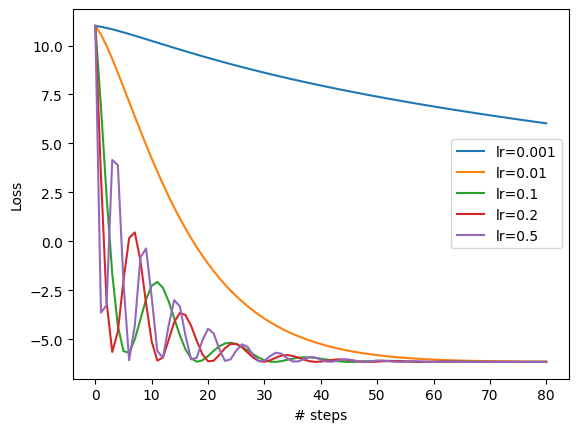

In [88]:
plt.plot(losses1, label='lr=0.001')
plt.plot(losses3, label='lr=0.01')
plt.plot(losses6, label='lr=0.1')
plt.plot(losses7, label='lr=0.2')
plt.plot(losses9, label='lr=0.5')
plt.xlabel('# steps')
plt.ylabel('Loss')
plt.legend()


In [89]:
print(f'lr = 0.001: {losses1[-1]}')
print(f'lr = 0.01: {losses3[-1]}')
print(f'lr = 0.1: {losses6[-1]}')
print(f'lr = 0.2: {losses7[-1]}')
print(f'lr = 0.5: {losses9[-1]}')


lr = 0.001: 6.028731495487023
lr = 0.01: -6.138393831883159
lr = 0.1: -6.147269867468327
lr = 0.2: -6.147809604682651
lr = 0.5: -6.147664801477497


## Momentum initialization

In [116]:
def adam_mi(df, x0, lr, N, beta=0.9, gamma=0.999, eps=1e-8):
    xs = [x0]

    D,_ = x0.shape

    x = x0

    # 1. Initialization
    g = df(x)
    V = g
    S = g**2
    
    for n in range(N):

        # 2. Compute gradient
        g = df(x)

        # 3. Compute 1st moment
        V = beta*V + (1 - beta)*g

        # 4. Compute 2nd moment
        S = gamma*S + (1 - gamma) * g**2
        
        # 5. Update
        x = x - lr * 1/np.sqrt(S + eps) * V
        
        xs.append(x)

    xs = np.array(xs).reshape((-1,D)).T

    return x, xs


In [122]:
x0 = np.array([[1],[-1]])
N = 200
lr = 0.2

xo0, logxs0 = adam(gradQ, x0, lr, N)
xoM, logxsM = adam_mi(gradQ, x0, lr, N)


In [123]:
print(xo0)
print(xoM)

[[-1.79993664]
 [ 1.09996542]]
[[-1.80008034]
 [ 1.10005833]]


In [124]:
print(loss(xo0))
print(loss(xoM))

-6.149999992766487
-6.14999998625677


In [125]:
_, N = logxs0.shape
losses0 = np.array([loss(logxs0[:,[i]]) for i in range(N)])
lossesM = np.array([loss(logxsM[:,[i]]) for i in range(N)])


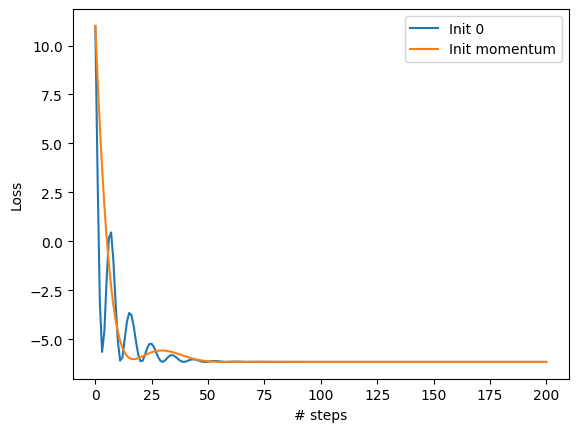

In [126]:
plt.plot(losses0, label='Init 0')
plt.plot(lossesM, label='Init momentum')
plt.xlabel('# steps')
plt.ylabel('Loss')
plt.legend()


# Appendix
<a name="Appendix"></a>

## Taylor series
<a name="Taylor"></a>

> **Taylor theorem.** 
> For a function $f: \mathbb{R} \rightarrow \mathbb{R}$ is $m$ times continuously differentiable (i.e., $f \in \mathcal{C}^m$) on an interval $[a,b]$.
> Denote $h = b - a$, then
>
> $$f(b) = f(a) + \frac{h}{1!} f^{(1)}(a) + \frac{h^2}{2!} f^{(2)}(a) + \cdots + \frac{h^{m-1}}{(m-1)!} f^{(m-1)}(a) + R_m$$

## Gradient of 2D quadratic function
<a name="GradientQuadratic"></a>

Recall symmetry: $Q_{12} = Q_{21}$

\begin{align}
f(x) &= x^T Q x + b^T x \\
&= \begin{bmatrix} x_1 & x_2 
\end{bmatrix}
\cdot
\begin{bmatrix} Q_{11} & Q_{12} \\ Q_{21} & Q_{22}
\end{bmatrix}
\cdot \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
+
\begin{bmatrix}b_1 & b_2 \end{bmatrix}
\cdot \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
\\
&= \begin{bmatrix}
   Q_{11} x_1 + Q_{21} x_2 & Q_{12} x_1 + Q_{22} x_2
   \end{bmatrix}
   \cdot \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
   + b_1 x_1 + b_2 x_2
\\
&= Q_{11} x_1^2 + Q_{21} x_2 x_1 + Q_{12} x_1 x_2 + Q_{22} x_2^2 + b_1 x_1 + b_2 x_2
\end{align}

Thus,

\begin{align}
\nabla f(x) &=
\begin{bmatrix}
2 Q_{11} x_1 + Q_{21} x_2 + Q_{12} x_2 + b_1 \\
Q_{21} x_1 + Q_{12} x_1 + 2 Q_{21} x_2 + b_2
\end{bmatrix}
\end{align}

Vectorize this

\begin{align}
\nabla f(x) &=
\begin{bmatrix}
2 Q_{11} & Q_{12} + Q_{21} \\
Q_{21} + Q_{12} & 2 Q_{22}
\end{bmatrix}
\cdot
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
+ \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}
\end{align}

Recall again that symmetry: $Q_{12} = Q_{21}$, therefore
$Q_{12} + Q_{21} = 2 Q_{12} = 2 Q_{21}$.

Beautify it to

\begin{align}
\nabla f(x) &=
2
\begin{bmatrix}
Q_{11} & Q_{12} \\
Q_{21} & Q_{22}
\end{bmatrix}
\cdot
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
+ \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}
\\
&= 2 Q x + b
\end{align}
